# Preparing data

Import all needed libraries.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model

Download the database and label the column names as described in the database.

In [ ]:
!mkdir models # create folder for storing all trained models

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz',names=['Elevation', 'Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points','Wilderness_Area_1','Wilderness_Area_2','Wilderness_Area_3','Wilderness_Area_4','Soil_Type_1','Soil_Type_2','Soil_Type_3','Soil_Type_4','Soil_Type_5','Soil_Type_6','Soil_Type_7','Soil_Type_8','Soil_Type_9','Soil_Type_10','Soil_Type_11','Soil_Type_12','Soil_Type_13','Soil_Type_14','Soil_Type_15','Soil_Type_16','Soil_Type_17','Soil_Type_18','Soil_Type_19','Soil_Type_20','Soil_Type_21','Soil_Type_22','Soil_Type_23','Soil_Type_24','Soil_Type_25','Soil_Type_26','Soil_Type_27','Soil_Type_28','Soil_Type_29','Soil_Type_30','Soil_Type_31','Soil_Type_32','Soil_Type_33','Soil_Type_34','Soil_Type_35','Soil_Type_36','Soil_Type_37','Soil_Type_38','Soil_Type_39','Soil_Type_40','Cover_Type' ])

Check the basic information about the data: the number of columns (features), which column contains the target data, how many samples are in the set, what type of data they are and whether there are any missing data.

In [ ]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_1                   581012 non-null  int64
 11  Wilderness_Area_2                   581012 non-null 

Check how many unique classes are in the dataset.

In [ ]:
data['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4])

Check if the data is balanced. You can see that the number of samples with labels 1 and 2 is much larger than the other labels. I will carry out two model learning processes:

1.   On unbalanced full data set.
2.   On balanced data, but smaller set (2000 samples for each class)

<AxesSubplot:>

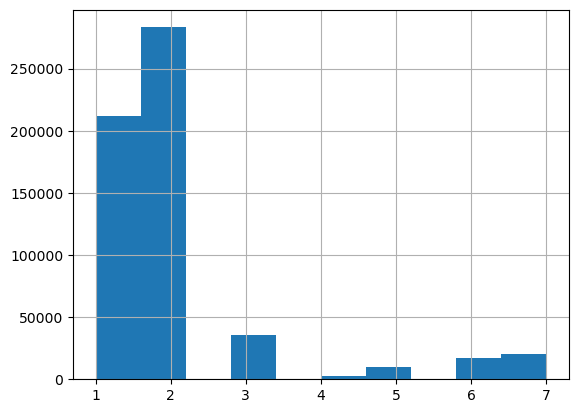

In [ ]:
data['Cover_Type'].hist()

Use the factorize() function to create a column where the labels are labeled [0, 1, 2, 3, 4, 5, 6] because the model expects classes to be labeled that way during the model training process.

In [ ]:
data['target'] = data['Cover_Type'].factorize()[0]

Create a list of features that will be used to train the model.

In [ ]:
feats = ['Elevation',
         'Aspect',
         'Slope',
         'Horizontal_Distance_To_Hydrology',
         'Vertical_Distance_To_Hydrology',
         'Horizontal_Distance_To_Roadways',
         'Hillshade_9am',
         'Hillshade_Noon',
         'Hillshade_3pm', 
         'Horizontal_Distance_To_Fire_Points',
         'Wilderness_Area_1',
         'Wilderness_Area_2',
         'Wilderness_Area_3',
         'Wilderness_Area_4',
         'Soil_Type_1',
         'Soil_Type_2',
         'Soil_Type_3',
         'Soil_Type_4',
         'Soil_Type_5',
         'Soil_Type_6',
         'Soil_Type_7',
         'Soil_Type_8',
         'Soil_Type_9',
         'Soil_Type_10',
         'Soil_Type_11',
         'Soil_Type_12',
         'Soil_Type_13',
         'Soil_Type_14',
         'Soil_Type_15',
         'Soil_Type_16',
         'Soil_Type_17',
         'Soil_Type_18',
         'Soil_Type_19',
         'Soil_Type_20',
         'Soil_Type_21',
         'Soil_Type_22',
         'Soil_Type_23',
         'Soil_Type_24',
         'Soil_Type_25',
         'Soil_Type_26',
         'Soil_Type_27',
         'Soil_Type_28',
         'Soil_Type_29',
         'Soil_Type_30',
         'Soil_Type_31',
         'Soil_Type_32',
         'Soil_Type_33',
         'Soil_Type_34',
         'Soil_Type_35',
         'Soil_Type_36',
         'Soil_Type_37',
         'Soil_Type_38',
         'Soil_Type_39',
         'Soil_Type_40']

Create a feature matrix X and a list of labels y.

In [ ]:
def get_X_y(feats):
    X = data[ feats ].values
    y = data['target'].values

    return X, y

X, y = get_X_y(feats)

Create the feature matrix X and the list of labels y on a balanced dataset.

In [ ]:
labels = data['target'].unique()
labels_amount = []
for label in labels:
  idx_label = np.where(label == y)[0]
  labels_amount.append(idx_label.shape[0])

idx_class_0 = np.where(label == 0)[0]

amount = 2000

X_balanced = np.zeros((1,54))
y_balanced = np.zeros((1,1))
for label in labels:
  idx_class = np.where(label == y)[0]
  idx_class_balanced = np.random.choice(idx_class, amount)
  X_tmp = X[idx_class_balanced,:]
  y_tmp = y[idx_class_balanced].reshape((amount,1))
 
  X_balanced = np.vstack((X_balanced, X_tmp))
  y_balanced = np.vstack((y_balanced, y_tmp))

y_balanced = y_balanced.reshape((y_balanced.shape[0],))

X_balanced = np.delete(X_balanced, 0, 0)
y_balanced = np.delete(y_balanced, 0, 0)


idx_shuffled = np.arange(1, y_balanced.shape[0])
np.random.shuffle(idx_shuffled)


X_balanced = X_balanced[idx_shuffled, :]
y_balanced = y_balanced[idx_shuffled]



Check if the dataset is really balanced.

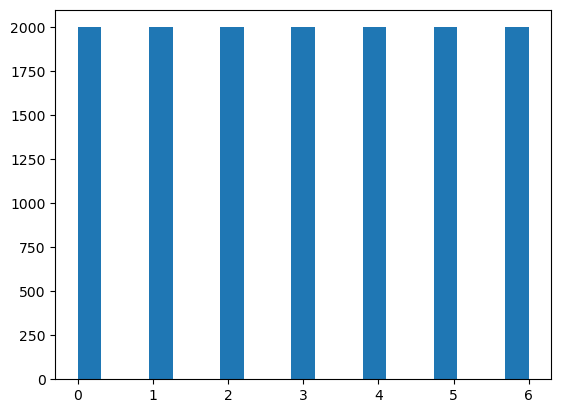

In [ ]:
plt.hist(y_balanced, bins='auto')
plt.show()

Create variables for training, validation and test data.

In [ ]:
X_balanced_train, X_balanced_val, y_balanced_train, y_balanced_val = train_test_split(X_balanced, y_balanced, test_size=0.2)
X_balanced_val, X_balanced_test, y_balanced_val, y_balanced_test = train_test_split(X_balanced_val, y_balanced_val, test_size=0.5)

y_balanced_cat_train = to_categorical(y_balanced_train)
y_balanced_cat_val = to_categorical(y_balanced_val)
y_balanced_cat_test = to_categorical(y_balanced_test)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5)

y_cat_train = to_categorical(y_train)
y_cat_val = to_categorical(y_val)
y_cat_test = to_categorical(y_test)

In [ ]:
num_classes = len(data['target'].unique())

# Useful functions

A function that creates a plot for a neural network model that shows the learning process using the accuracy metric and the loss function.

In [ ]:
def draw_learning_curve(history, key='accuracy'):

  fig, ax = plt.subplots(1, 2, figsize=(12,6))
  ax[0].plot(history.history[key])
  ax[0].plot(history.history['val_'+ key] )
  ax[0].set_ylabel(key.title())
  ax[0].set_xlabel('Epoch')
  ax[0].legend(['train', 'val'])

  ax[1].plot(history.history['loss'])
  ax[1].plot(history.history['val_loss'] )
  ax[1].set_ylim([0,1])
  ax[1].set_ylabel('loss'.title())
  ax[1].set_xlabel('Epoch')
  ax[1].legend(['train', 'val'])
  fig.suptitle('Learning curve')
  plt.show()


A function that creates a confusion matrix, i.e. a combination of labels predicted by the trained model and real labels from the data set.

In [ ]:
def get_confusion_matrix(model_type, data_type, model, X_test, y_test):
  title_string = 'model: ' + model_type + ' | ' + 'data type: ' + data_type
  print(title_string)
  y_pred = model.predict(X_test)

  if(model_type== 'Neural Network'):
    pred_labels=[]
    for idx in range(len(y_pred)):
      pred_label = np.argmax(y_pred[idx])
      pred_labels.append(pred_label)

  true_labels = y_test
  score = accuracy_score(true_labels, pred_labels)

  ConfusionMatrixDisplay.from_predictions(true_labels, pred_labels, normalize='true')

  return score 

The function in which I initialize, compile and train the model. The function returns:

* trained model
* training history
* the best epoch, i.e. the number of the epoch in which the succes metric on the validation data reached the highest score
* the result achieved by the succes metric on training data in the best epoch
* the result achieved by the loss function on the training data in the best epoch
* highest succes metric score on validation data
* the result achieved by the loss function on the validation data in the best epoch







In [ ]:
def train_model(X_train, y_train, X_val, y_val, hyperparameters):
  epochs, batch_size, learning_rate = hyperparameters
  input_size = 54
  model = Sequential([
    Dense(2*input_size, input_dim=input_size, activation='relu'),
    Dense(3*input_size, activation='relu'),
    Dense(4*input_size, activation='relu'),
    Dropout(0.1),
    Dense(num_classes, activation='softmax')
  ])
  
  opt = keras.optimizers.Adam(learning_rate=learning_rate)

  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics='accuracy')
  callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
  history = model.fit(X_train, y_train,
          batch_size=batch_size, epochs=epochs, callbacks=[callback], verbose=1,
          validation_data=(X_val, y_val))
  
  best_epoch = np.argmax(history.history['val_accuracy'])
  best_val_accuracy = history.history['val_accuracy'][best_epoch]
  best_val_loss = history.history['val_loss'][best_epoch]
  train_accuracy = history.history['accuracy'][best_epoch]
  train_loss = history.history['loss'][best_epoch]


  return model, history, best_epoch, train_accuracy, train_loss, best_val_accuracy, best_val_loss


Function, which allows you to train the model using different hyperparameters to find the best configuration.
The function returns:

* a trained model that achieve the highest metric score using selected hyperparameters
* data in pandas dataframe, in which hyperparameters and the result of learning using them were saved, which later facilitates the comparison of learning processes of all models
* the history of training the best model, which can later be presented by plot
* best batch size
* best leraning rate



In [ ]:
def hyperparameters_grid_search(data_type, X_train, y_train, X_val, y_val, batch_sizes, learning_rates, mach_epochs):
  path = "./models/"
  hyperparameters_data = []
  new_val_accuracy = 0
  for idx_lr, lr in enumerate(learning_rates):
    for idx_batch_size, batch_size in enumerate(batch_sizes):
      hyperparameters = [max_epochs, batch_size, lr]
      print("="*10)
      print("="*10)
      print("learning_rate  = " + str(lr) + " | " + str(idx_lr+1) + " / " + str(len(learning_rates)) )
      print("batch_size = " + str(batch_size) + " | " + str(idx_batch_size+1) + " / " + str(len(batch_sizes)) )
      model, training_history, best_epoch, train_accuracy, train_loss, best_val_accuracy, best_val_loss = train_model(X_train, y_train, X_val, y_val, hyperparameters)
      
      if(best_val_accuracy > new_val_accuracy):
        new_val_accuracy = best_val_accuracy
        best_plot, best_lr, best_batch_size = training_history, lr, batch_size
        best_NN_model = model
        if(data_type == 'balanced'):
          best_NN_model.save(path+'NN_model_balanced_batch_size{}_lr{}.h5'.format(best_batch_size, best_lr))
        elif(data_type == 'unbalanced'):
          best_NN_model.save(path+'NN_model_batch_size{}_lr{}.h5'.format(best_batch_size, best_lr))
        else:
          print('DATA TYPE ERROR! You can choose: balanced or unbalanced')


        hyperparameters_dict = {
          'learning_rate' : lr,
          'batch_size' : batch_size,
          'best_val_accuracy': best_val_accuracy,
          'best_val_loss': best_val_loss,
          'train_accuracy': train_accuracy,
          'train_loss': train_loss,
          'best_epoch': best_epoch,
          'max_epochs' : max_epochs,
          'training_history': training_history
        }
        hyperparameters_data.append(hyperparameters_dict)
      
      else:
        hyperparameters_dict = {
          'learning_rate' : lr,
          'batch_size' : batch_size,
          'best_val_accuracy': best_val_accuracy,
          'best_val_loss': best_val_loss,
          'train_accuracy': train_accuracy,
          'train_loss': train_loss,
          'best_epoch': best_epoch,
          'max_epochs' : max_epochs,
          'training_history': training_history
        }
        hyperparameters_data.append(hyperparameters_dict)

  dataframe_training = pd.DataFrame(hyperparameters_data)
  return best_NN_model, dataframe_training, best_plot, best_lr, best_batch_size

# Training classic machine learning models and the heuristic model - Dummy model

A function that allows you to train the model and calculate the result of the success metric. It then creates a confusion matrix and a bar chart showing the performance of three models: Dummy, Decision tree, Random forest. The function will also save the trained models.

In [ ]:
def get_models():
    
    models = [('dummy', DummyClassifier(strategy='stratified')),
        ('decision_tree', DecisionTreeClassifier(max_depth=10)),
        ('random_forest', RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0)),
    ]
    
    return models

def plot_results(result, scoring):

    result = sorted(result, key=lambda x: x[1])

    ys = [i[1] for i in result]
    xs_labels = [i[0] for i in result]
    xs = range(len(xs_labels))
    
    plt.figure(figsize=(15, 5))
    plt.title('best model={}, {}={}'.format(xs_labels[-1], scoring, ys[-1] ), fontsize=14)
    plt.xlabel('models')
    plt.ylabel(scoring)
    plt.bar(xs, ys)
    plt.xticks(xs, xs_labels, rotation=90)
    

def run_models(data_type, X_train, y_train, X_test, y_test, scoring, plot_result=True):
    path = "./models/"
    result = []

    for it, (model_name, model) in enumerate(get_models()):
        
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, normalize='true')

        test_score = accuracy_score(y_test, y_pred)

        print("model={}, {}: {}".format(model_name, scoring, test_score))

        if(data_type == 'balanced'):
          joblib.dump(model, path + '{}_balanced.joblib'.format(model_name))
        elif(data_type == 'unbalanced'):
          joblib.dump(model, path + '{}.joblib'.format(model_name))
        else:
          print('DATA TYPE ERROR! You can choose: balanced or unbalanced')
        
        result.append((model_name, test_score))
        plt.show()
        
    if plot_result:
        plot_results(result, scoring)

    
    return result

The success metric and the confusion matrix look best for the Decision tree model. The confusion matrix shows that the Dummy model most often predicts labels 1 and 2 because they are the largest groups in the unbalanced dataset.

model=dummy, accuracy: 0.3769577639323948


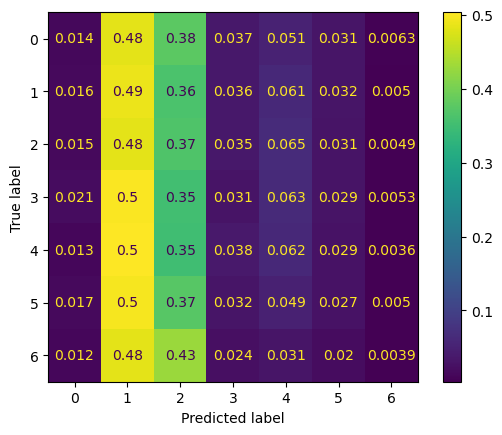

model=decision_tree, accuracy: 0.7778217617293725


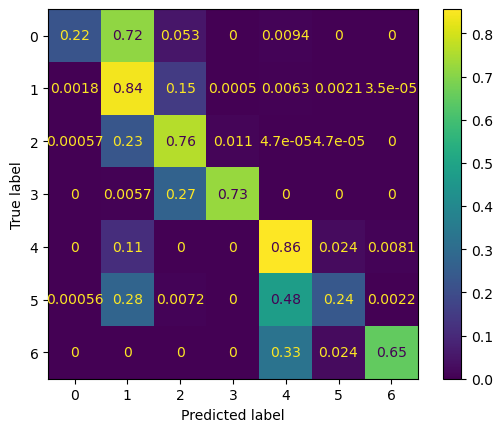

model=random_forest, accuracy: 0.7487349833052218


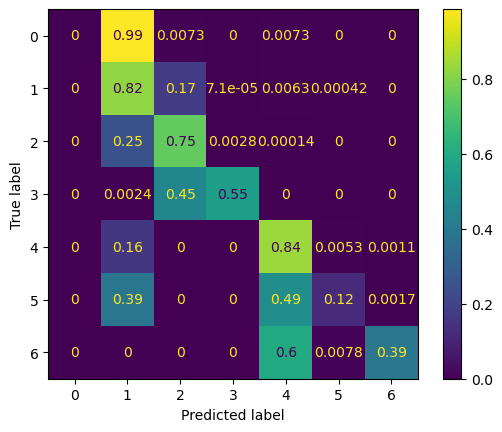

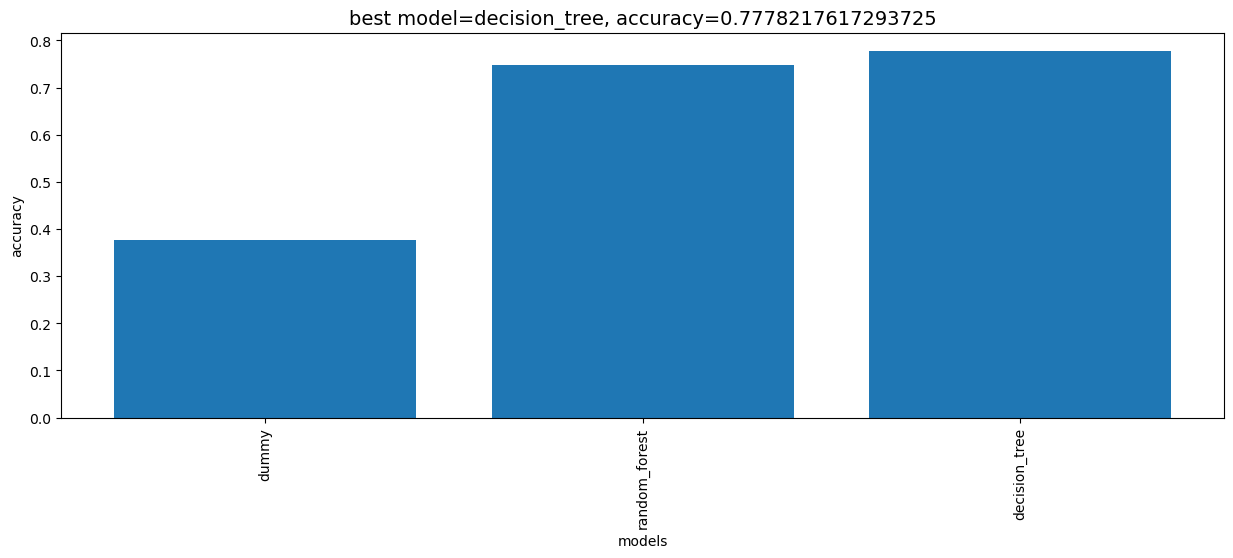

In [ ]:
result = run_models('unbalanced', X_train, y_train, X_test, y_test, scoring='accuracy')

For a balanced dataset, the Random forest model performs best with the highest success metric score. Also, the confusion matrix for Random forest and Decision Tree models looks better than when using an unbalanced dataset.

model=dummy, accuracy: 0.13785714285714284


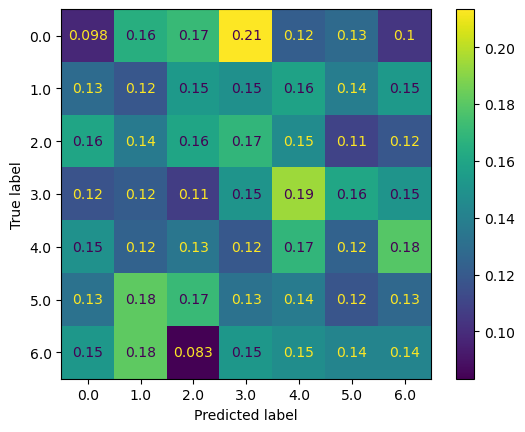

model=decision_tree, accuracy: 0.7607142857142857


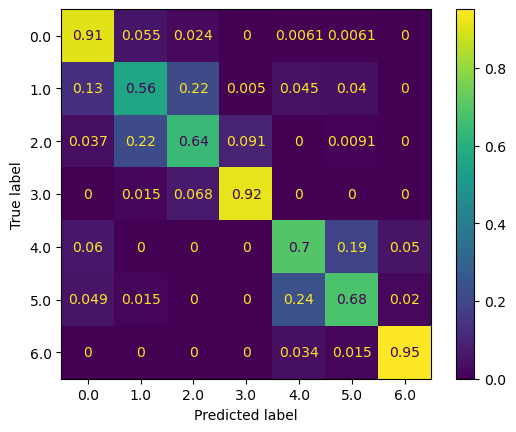

model=random_forest, accuracy: 0.7842857142857143


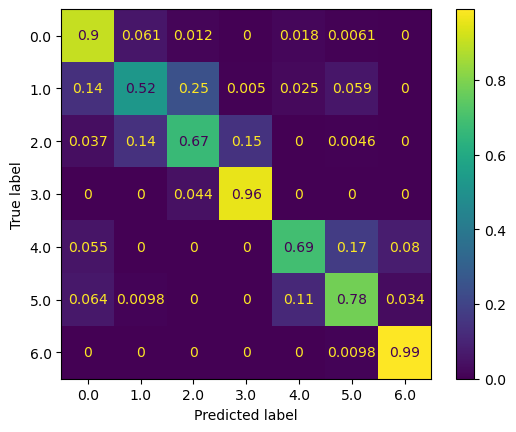

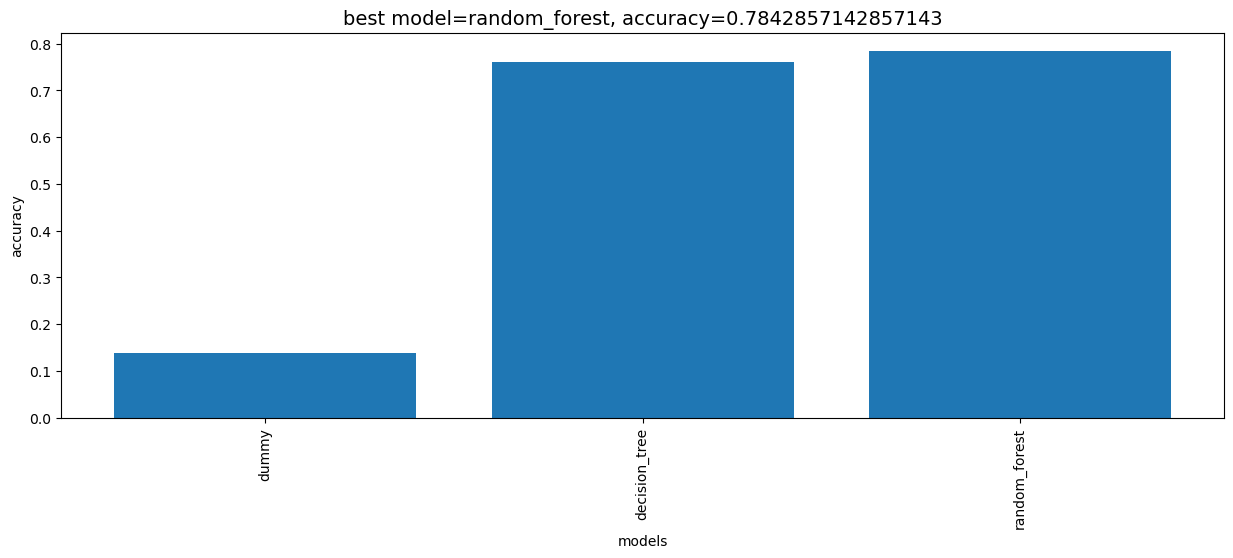

In [ ]:
result_balanced = run_models('balanced', X_balanced_train, y_balanced_train, X_balanced_test, y_balanced_test,scoring='accuracy', plot_result=True)

As we can see both Decision Tree model, and Random Forest model, performes better in prediction when trained on balanced dataset, while Dummy model performs better on unbalanced (original) dataset, thus we:

In [ ]:
!cp ./models/dummy.joblib ./models/dummy_best.joblib
!cp ./models/decision_tree_balanced.joblib ./models/decision_tree_best.joblib
!cp ./models/random_forest_balanced.joblib ./models/random_forest_best.joblib

# Training Neutal Network models on unbalanced data

The given lists of hyperparameters will be used to train the models. In order to find the optimal number of epochs, I used the keras.callbacks.EarlyStopping function, which will cause the model to stop training if there is no significant progress in the success metric for a certain number of epochs.

Training models, searching for the most optimal parameters.

In [ ]:
batch_sizes = [256, 512, 1024]
learning_rates = [0.001, 0.0005, 0.0001]
max_epochs = 100

best_NN_model, dataframe_training, best_plot, best_lr, best_batch_size = hyperparameters_grid_search('unbalanced', X_train, y_cat_train, X_val, y_cat_val, batch_sizes, learning_rates, max_epochs)

learning_rate  = 0.001 | 1 / 3
batch_size = 256 | 1 / 3
Epoch 1/100


2023-04-22 13:48:34.194719: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-22 13:48:34.194874: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-22 13:48:34.194908: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-04-22 13:48:34.194935: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-04-22 13:48:34.194958: W tensorflow/c

1816/1816 [==============================] - 4s 2ms/step - loss: 2.6057 - accuracy: 0.6075 - val_loss: 0.6971 - val_accuracy: 0.6982
Epoch 2/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.7087 - accuracy: 0.6940 - val_loss: 0.6454 - val_accuracy: 0.7180
Epoch 3/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.6640 - accuracy: 0.7129 - val_loss: 0.6598 - val_accuracy: 0.7100
Epoch 4/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.6286 - accuracy: 0.7277 - val_loss: 0.5945 - val_accuracy: 0.7403
Epoch 5/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.5915 - accuracy: 0.7431 - val_loss: 0.6051 - val_accuracy: 0.7296
Epoch 6/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.5608 - accuracy: 0.7551 - val_loss: 0.5040 - val_accuracy: 0.7783
Epoch 7/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.5326 - accuracy: 0.7674 - val_loss: 0.5018 - val_accuracy: 0.78

908/908 [==============================] - 2s 3ms/step - loss: 0.3821 - accuracy: 0.8367 - val_loss: 0.3609 - val_accuracy: 0.8457
Epoch 28/100
908/908 [==============================] - 2s 3ms/step - loss: 0.3766 - accuracy: 0.8384 - val_loss: 0.3489 - val_accuracy: 0.8537
Epoch 29/100
908/908 [==============================] - 2s 3ms/step - loss: 0.3747 - accuracy: 0.8395 - val_loss: 0.3644 - val_accuracy: 0.8445
Epoch 30/100
908/908 [==============================] - 2s 3ms/step - loss: 0.3721 - accuracy: 0.8405 - val_loss: 0.3566 - val_accuracy: 0.8484
Epoch 31/100
908/908 [==============================] - 2s 3ms/step - loss: 0.3684 - accuracy: 0.8419 - val_loss: 0.3442 - val_accuracy: 0.8524
Epoch 32/100
908/908 [==============================] - 2s 3ms/step - loss: 0.3666 - accuracy: 0.8426 - val_loss: 0.3476 - val_accuracy: 0.8498
Epoch 33/100
908/908 [==============================] - 2s 3ms/step - loss: 0.3604 - accuracy: 0.8452 - val_loss: 0.3407 - val_accuracy: 0.8541
Epoch

Epoch 84/100
908/908 [==============================] - 2s 3ms/step - loss: 0.2937 - accuracy: 0.8754 - val_loss: 0.2881 - val_accuracy: 0.8771
Epoch 85/100
908/908 [==============================] - 2s 3ms/step - loss: 0.2913 - accuracy: 0.8766 - val_loss: 0.2771 - val_accuracy: 0.8839
Epoch 86/100
908/908 [==============================] - 2s 3ms/step - loss: 0.2906 - accuracy: 0.8767 - val_loss: 0.2722 - val_accuracy: 0.8854
Epoch 87/100
908/908 [==============================] - 2s 3ms/step - loss: 0.2912 - accuracy: 0.8770 - val_loss: 0.2727 - val_accuracy: 0.8860
Epoch 88/100
908/908 [==============================] - 2s 3ms/step - loss: 0.2895 - accuracy: 0.8772 - val_loss: 0.2766 - val_accuracy: 0.8850
Epoch 89/100
908/908 [==============================] - 2s 3ms/step - loss: 0.2911 - accuracy: 0.8775 - val_loss: 0.2838 - val_accuracy: 0.8792
Epoch 90/100
908/908 [==============================] - 2s 3ms/step - loss: 0.2894 - accuracy: 0.8774 - val_loss: 0.2766 - val_accuracy:

Epoch 97/100
454/454 [==============================] - 2s 3ms/step - loss: 0.2712 - accuracy: 0.8853 - val_loss: 0.2540 - val_accuracy: 0.8932
Epoch 98/100
454/454 [==============================] - 2s 3ms/step - loss: 0.2739 - accuracy: 0.8843 - val_loss: 0.2476 - val_accuracy: 0.8969
Epoch 99/100
454/454 [==============================] - 2s 3ms/step - loss: 0.2700 - accuracy: 0.8859 - val_loss: 0.2517 - val_accuracy: 0.8949
Epoch 100/100
454/454 [==============================] - 2s 3ms/step - loss: 0.2680 - accuracy: 0.8872 - val_loss: 0.2556 - val_accuracy: 0.8935
learning_rate  = 0.0005 | 2 / 3
batch_size = 256 | 1 / 3
Epoch 1/100
1816/1816 [==============================] - 4s 2ms/step - loss: 2.8515 - accuracy: 0.5734 - val_loss: 0.7727 - val_accuracy: 0.6801
Epoch 2/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.7819 - accuracy: 0.6654 - val_loss: 0.7286 - val_accuracy: 0.6950
Epoch 3/100
1816/1816 [==============================] - 3s 2ms/step - loss:

Epoch 53/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.3415 - accuracy: 0.8519 - val_loss: 0.3117 - val_accuracy: 0.8684
Epoch 54/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.3392 - accuracy: 0.8529 - val_loss: 0.3135 - val_accuracy: 0.8671
Epoch 55/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.3374 - accuracy: 0.8542 - val_loss: 0.3105 - val_accuracy: 0.8677
Epoch 56/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.3349 - accuracy: 0.8558 - val_loss: 0.3093 - val_accuracy: 0.8677
Epoch 57/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.3339 - accuracy: 0.8558 - val_loss: 0.3077 - val_accuracy: 0.8679
Epoch 58/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.3303 - accuracy: 0.8572 - val_loss: 0.3061 - val_accuracy: 0.8692
Epoch 59/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.3285 - accuracy: 0.8585 - val_loss: 0.3057 -

Epoch 9/100
908/908 [==============================] - 2s 3ms/step - loss: 0.6145 - accuracy: 0.7369 - val_loss: 0.5559 - val_accuracy: 0.7617
Epoch 10/100
908/908 [==============================] - 2s 3ms/step - loss: 0.6007 - accuracy: 0.7423 - val_loss: 0.5549 - val_accuracy: 0.7632
Epoch 11/100
908/908 [==============================] - 2s 3ms/step - loss: 0.5897 - accuracy: 0.7472 - val_loss: 0.5648 - val_accuracy: 0.7545
Epoch 12/100
908/908 [==============================] - 2s 3ms/step - loss: 0.5757 - accuracy: 0.7525 - val_loss: 0.5365 - val_accuracy: 0.7694
Epoch 13/100
908/908 [==============================] - 2s 3ms/step - loss: 0.5670 - accuracy: 0.7558 - val_loss: 0.5219 - val_accuracy: 0.7724
Epoch 14/100
908/908 [==============================] - 2s 3ms/step - loss: 0.5550 - accuracy: 0.7601 - val_loss: 0.5215 - val_accuracy: 0.7745
Epoch 15/100
908/908 [==============================] - 2s 3ms/step - loss: 0.5487 - accuracy: 0.7626 - val_loss: 0.5129 - val_accuracy: 

Epoch 66/100
908/908 [==============================] - 2s 3ms/step - loss: 0.3408 - accuracy: 0.8534 - val_loss: 0.3322 - val_accuracy: 0.8576
Epoch 67/100
908/908 [==============================] - 2s 3ms/step - loss: 0.3372 - accuracy: 0.8557 - val_loss: 0.3174 - val_accuracy: 0.8629
Epoch 68/100
908/908 [==============================] - 2s 3ms/step - loss: 0.3337 - accuracy: 0.8571 - val_loss: 0.3151 - val_accuracy: 0.8662
Epoch 69/100
908/908 [==============================] - 2s 3ms/step - loss: 0.3340 - accuracy: 0.8567 - val_loss: 0.3276 - val_accuracy: 0.8608
Epoch 70/100
908/908 [==============================] - 2s 3ms/step - loss: 0.3323 - accuracy: 0.8569 - val_loss: 0.3128 - val_accuracy: 0.8657
Epoch 71/100
908/908 [==============================] - 2s 3ms/step - loss: 0.3308 - accuracy: 0.8580 - val_loss: 0.3052 - val_accuracy: 0.8668
Epoch 72/100
908/908 [==============================] - 2s 3ms/step - loss: 0.3285 - accuracy: 0.8596 - val_loss: 0.3181 - val_accuracy:

Epoch 79/100
454/454 [==============================] - 2s 3ms/step - loss: 0.3193 - accuracy: 0.8638 - val_loss: 0.3027 - val_accuracy: 0.8725
Epoch 80/100
454/454 [==============================] - 2s 3ms/step - loss: 0.3202 - accuracy: 0.8632 - val_loss: 0.3021 - val_accuracy: 0.8725
Epoch 81/100
454/454 [==============================] - 2s 3ms/step - loss: 0.3168 - accuracy: 0.8645 - val_loss: 0.2990 - val_accuracy: 0.8749
Epoch 82/100
454/454 [==============================] - 2s 3ms/step - loss: 0.3139 - accuracy: 0.8662 - val_loss: 0.2920 - val_accuracy: 0.8757
Epoch 83/100
454/454 [==============================] - 2s 3ms/step - loss: 0.3151 - accuracy: 0.8649 - val_loss: 0.2936 - val_accuracy: 0.8784
Epoch 84/100
454/454 [==============================] - 2s 3ms/step - loss: 0.3140 - accuracy: 0.8663 - val_loss: 0.2943 - val_accuracy: 0.8776
Epoch 85/100
454/454 [==============================] - 2s 3ms/step - loss: 0.3107 - accuracy: 0.8677 - val_loss: 0.3012 - val_accuracy:

Epoch 35/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.5145 - accuracy: 0.7794 - val_loss: 0.4770 - val_accuracy: 0.7950
Epoch 36/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.5136 - accuracy: 0.7803 - val_loss: 0.4840 - val_accuracy: 0.7930
Epoch 37/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.5095 - accuracy: 0.7813 - val_loss: 0.4743 - val_accuracy: 0.7965
Epoch 38/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.5076 - accuracy: 0.7819 - val_loss: 0.4718 - val_accuracy: 0.7981
Epoch 39/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.5039 - accuracy: 0.7835 - val_loss: 0.4770 - val_accuracy: 0.7963
Epoch 40/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.5005 - accuracy: 0.7850 - val_loss: 0.4778 - val_accuracy: 0.7950
Epoch 41/100
1816/1816 [==============================] - 3s 2ms/step - loss: 0.4981 - accuracy: 0.7857 - val_loss: 0.4589 -

908/908 [==============================] - 2s 3ms/step - loss: 0.4395 - accuracy: 0.8107 - val_loss: 0.4084 - val_accuracy: 0.8255
Epoch 48/100
908/908 [==============================] - 2s 3ms/step - loss: 0.4379 - accuracy: 0.8112 - val_loss: 0.4043 - val_accuracy: 0.8266
Epoch 49/100
908/908 [==============================] - 2s 3ms/step - loss: 0.4361 - accuracy: 0.8118 - val_loss: 0.4126 - val_accuracy: 0.8207
Epoch 50/100
908/908 [==============================] - 2s 3ms/step - loss: 0.4334 - accuracy: 0.8134 - val_loss: 0.4041 - val_accuracy: 0.8266
Epoch 51/100
908/908 [==============================] - 2s 3ms/step - loss: 0.4302 - accuracy: 0.8146 - val_loss: 0.4049 - val_accuracy: 0.8271
Epoch 52/100
908/908 [==============================] - 2s 3ms/step - loss: 0.4296 - accuracy: 0.8156 - val_loss: 0.3965 - val_accuracy: 0.8330
Epoch 53/100
908/908 [==============================] - 2s 3ms/step - loss: 0.4282 - accuracy: 0.8151 - val_loss: 0.4001 - val_accuracy: 0.8291
Epoch

454/454 [==============================] - 2s 3ms/step - loss: 0.4874 - accuracy: 0.7895 - val_loss: 0.4640 - val_accuracy: 0.7992
Epoch 61/100
454/454 [==============================] - 2s 3ms/step - loss: 0.4861 - accuracy: 0.7899 - val_loss: 0.4526 - val_accuracy: 0.8028
Epoch 62/100
454/454 [==============================] - 2s 3ms/step - loss: 0.4865 - accuracy: 0.7897 - val_loss: 0.4523 - val_accuracy: 0.8060
Epoch 63/100
454/454 [==============================] - 2s 3ms/step - loss: 0.4836 - accuracy: 0.7911 - val_loss: 0.4505 - val_accuracy: 0.8045
Epoch 64/100
454/454 [==============================] - 2s 3ms/step - loss: 0.4813 - accuracy: 0.7928 - val_loss: 0.4495 - val_accuracy: 0.8068
Epoch 65/100
454/454 [==============================] - 2s 3ms/step - loss: 0.4813 - accuracy: 0.7922 - val_loss: 0.4483 - val_accuracy: 0.8058
Epoch 66/100
454/454 [==============================] - 2s 3ms/step - loss: 0.4793 - accuracy: 0.7933 - val_loss: 0.4498 - val_accuracy: 0.8062
Epoch

Below I save pandas dataframe with training history.

In [ ]:
dataframe_training.to_pickle("./models/history_traininig_unbalanced_data.pkl");

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dropout
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-04-22 14:23:17       754028
metadata.json                                  2023-04-22 14:23:17           64
config.json                                    2

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dropout
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-04-22 14:23:17       754028
metadata.json                                  2023-04-22 14:23:17           64
config.json                                    2

In [ ]:
dataframe_training.head()

,learning_rate,batch_size,best_val_accuracy,best_val_loss,train_accuracy,train_loss,best_epoch,max_epochs,training_history
0,0.0010,256,0.891912,0.264714,0.874684,0.296862,70,100,<keras.callbacks.History object at 0x7fa4740ec...
1,0.0010,512,0.892498,0.255694,0.879374,0.285525,96,100,<keras.callbacks.History object at 0x7fa40c6af...
2,0.0010,1024,0.896869,0.247554,0.884312,0.273893,97,100,<keras.callbacks.History object at 0x7fa476315...
3,0.0005,256,0.893461,0.253635,0.880747,0.278112,98,100,<keras.callbacks.History object at 0x7fa4745f4...
4,0.0005,512,0.887816,0.269496,0.873862,0.296107,96,100,<keras.callbacks.History object at 0x7fa4749dd...


Plot of the learning process (success metrics and loss function) for the best model trained on unbalanced data.The plot shows that the network did not overfit. The model will achieve a high accuracy score and a decying loss function score.

HYPERPARAMETERS | Bach_size: 1024 Learning_rate: 0.001 


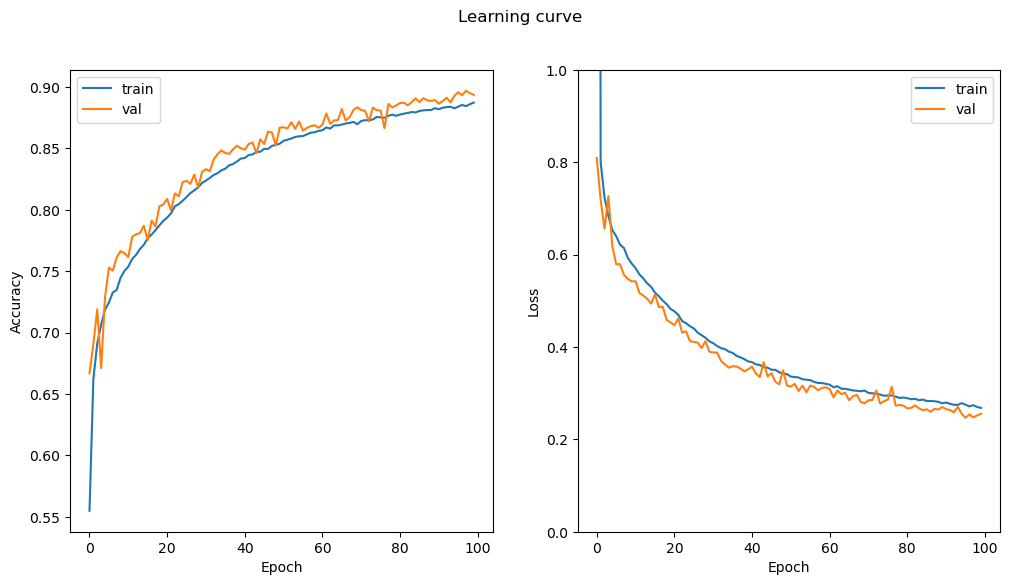

In [ ]:
print('HYPERPARAMETERS | Bach_size: {} Learning_rate: {} '.format(best_batch_size, best_lr))
draw_learning_curve(best_plot)

Confusion matrix for the best model trained for unbalanced data.The confusion matrix shows that the model correctly predicts the classes. It performs the worst with label 0, because it predicts label 1 in its place.

model: Neural Network | data type: unbalanced
1816/1816 [==============================] - 1s 409us/step


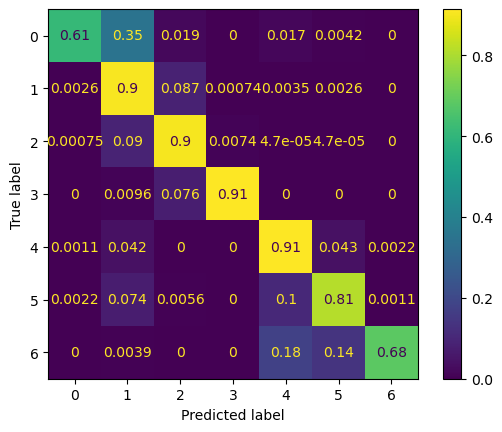

In [ ]:
NN_score = get_confusion_matrix('Neural Network', 'unbalanced', best_NN_model, X_test, y_test)

# Training Neural Network models on balanced data

Training models, searching for the most optimal parameters.

In [ ]:
batch_sizes = [256, 512, 1024]
learning_rates = [0.001, 0.0005, 0.0001]
max_epochs = 100

best_NN_model_balanced, dataframe_training_balanced, best_plot_balanced, best_lr_balanced, best_batch_size_balanced = hyperparameters_grid_search('balanced', X_balanced_train, y_balanced_cat_train, X_balanced_val, y_balanced_cat_val, batch_sizes, learning_rates, max_epochs)

learning_rate  = 0.001 | 1 / 3
batch_size = 256 | 1 / 3
Epoch 1/100
44/44 [==============================] - 1s 4ms/step - loss: 57.4715 - accuracy: 0.2264 - val_loss: 8.8704 - val_accuracy: 0.3450
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 8.6598 - accuracy: 0.3215 - val_loss: 2.8089 - val_accuracy: 0.4071
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 2.8944 - accuracy: 0.3775 - val_loss: 1.6153 - val_accuracy: 0.4421
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 1.6644 - accuracy: 0.4186 - val_loss: 1.3750 - val_accuracy: 0.4807
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 1.3928 - accuracy: 0.4614 - val_loss: 1.2509 - val_accuracy: 0.4843
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 1.2939 - accuracy: 0.4846 - val_loss: 1.1934 - val_accuracy: 0.5107
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 1.2297 - accuracy: 0.508

Epoch 12/100
22/22 [==============================] - 0s 3ms/step - loss: 1.3100 - accuracy: 0.4709 - val_loss: 1.2535 - val_accuracy: 0.5093
Epoch 13/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2674 - accuracy: 0.4914 - val_loss: 1.2398 - val_accuracy: 0.4979
Epoch 14/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2433 - accuracy: 0.4951 - val_loss: 1.2026 - val_accuracy: 0.5179
Epoch 15/100
22/22 [==============================] - 0s 3ms/step - loss: 1.2044 - accuracy: 0.5139 - val_loss: 1.1549 - val_accuracy: 0.5200
Epoch 16/100
22/22 [==============================] - 0s 4ms/step - loss: 1.1760 - accuracy: 0.5168 - val_loss: 1.1696 - val_accuracy: 0.5314
Epoch 17/100
22/22 [==============================] - 0s 3ms/step - loss: 1.1531 - accuracy: 0.5286 - val_loss: 1.1069 - val_accuracy: 0.5493
Epoch 18/100
22/22 [==============================] - 0s 3ms/step - loss: 1.1224 - accuracy: 0.5409 - val_loss: 1.0793 - val_accuracy: 0.5636
Epoch 

Epoch 71/100
11/11 [==============================] - 0s 5ms/step - loss: 0.7160 - accuracy: 0.7021 - val_loss: 0.7227 - val_accuracy: 0.6900
Epoch 72/100
11/11 [==============================] - 0s 5ms/step - loss: 0.7309 - accuracy: 0.6997 - val_loss: 0.7494 - val_accuracy: 0.6793
Epoch 73/100
11/11 [==============================] - 0s 5ms/step - loss: 0.7161 - accuracy: 0.7018 - val_loss: 0.7165 - val_accuracy: 0.6971
Epoch 74/100
11/11 [==============================] - 0s 5ms/step - loss: 0.7013 - accuracy: 0.7110 - val_loss: 0.7188 - val_accuracy: 0.6921
Epoch 75/100
11/11 [==============================] - 0s 5ms/step - loss: 0.7011 - accuracy: 0.7113 - val_loss: 0.7114 - val_accuracy: 0.7029
Epoch 76/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6983 - accuracy: 0.7106 - val_loss: 0.7156 - val_accuracy: 0.6929
Epoch 77/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.7189 - val_loss: 0.7281 - val_accuracy: 0.6993
Epoch 

22/22 [==============================] - 0s 3ms/step - loss: 0.9725 - accuracy: 0.5973 - val_loss: 0.9233 - val_accuracy: 0.6414
Epoch 38/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9525 - accuracy: 0.6120 - val_loss: 0.9229 - val_accuracy: 0.6307
Epoch 39/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9469 - accuracy: 0.6152 - val_loss: 0.9035 - val_accuracy: 0.6529
Epoch 40/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9333 - accuracy: 0.6197 - val_loss: 0.9229 - val_accuracy: 0.6279
Epoch 41/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9172 - accuracy: 0.6239 - val_loss: 0.9017 - val_accuracy: 0.6307
Epoch 42/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9330 - accuracy: 0.6122 - val_loss: 0.9104 - val_accuracy: 0.6379
Epoch 43/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9219 - accuracy: 0.6201 - val_loss: 0.8998 - val_accuracy: 0.6379
Epoch 44/100
22/22 

Epoch 67/100
11/11 [==============================] - 0s 5ms/step - loss: 0.8797 - accuracy: 0.6413 - val_loss: 0.8617 - val_accuracy: 0.6436
Epoch 68/100
11/11 [==============================] - 0s 5ms/step - loss: 0.8614 - accuracy: 0.6540 - val_loss: 0.8419 - val_accuracy: 0.6714
Epoch 69/100
11/11 [==============================] - 0s 5ms/step - loss: 0.8530 - accuracy: 0.6582 - val_loss: 0.8503 - val_accuracy: 0.6536
Epoch 70/100
11/11 [==============================] - 0s 5ms/step - loss: 0.8555 - accuracy: 0.6511 - val_loss: 0.8487 - val_accuracy: 0.6600
Epoch 71/100
11/11 [==============================] - 0s 5ms/step - loss: 0.8644 - accuracy: 0.6541 - val_loss: 0.8704 - val_accuracy: 0.6507
Epoch 72/100
11/11 [==============================] - 0s 5ms/step - loss: 0.8626 - accuracy: 0.6529 - val_loss: 0.8373 - val_accuracy: 0.6614
Epoch 73/100
11/11 [==============================] - 0s 5ms/step - loss: 0.8475 - accuracy: 0.6562 - val_loss: 0.8449 - val_accuracy: 0.6571
Epoch 

Epoch 82/100
44/44 [==============================] - 0s 2ms/step - loss: 0.8363 - accuracy: 0.6643 - val_loss: 0.8368 - val_accuracy: 0.6721
Epoch 83/100
44/44 [==============================] - 0s 2ms/step - loss: 0.8342 - accuracy: 0.6682 - val_loss: 0.8513 - val_accuracy: 0.6571
Epoch 84/100
44/44 [==============================] - 0s 2ms/step - loss: 0.8332 - accuracy: 0.6676 - val_loss: 0.8317 - val_accuracy: 0.6771
Epoch 85/100
44/44 [==============================] - 0s 2ms/step - loss: 0.8189 - accuracy: 0.6740 - val_loss: 0.8506 - val_accuracy: 0.6614
Epoch 86/100
44/44 [==============================] - 0s 2ms/step - loss: 0.8153 - accuracy: 0.6713 - val_loss: 0.8256 - val_accuracy: 0.6750
Epoch 87/100
44/44 [==============================] - 0s 2ms/step - loss: 0.8136 - accuracy: 0.6743 - val_loss: 0.8419 - val_accuracy: 0.6664
Epoch 88/100
44/44 [==============================] - 0s 2ms/step - loss: 0.8055 - accuracy: 0.6749 - val_loss: 0.8154 - val_accuracy: 0.6857
Epoch 

22/22 [==============================] - 0s 3ms/step - loss: 1.4455 - accuracy: 0.4717 - val_loss: 1.3076 - val_accuracy: 0.5043
Epoch 40/100
22/22 [==============================] - 0s 3ms/step - loss: 1.4131 - accuracy: 0.4817 - val_loss: 1.2781 - val_accuracy: 0.5071
Epoch 41/100
22/22 [==============================] - 0s 3ms/step - loss: 1.4214 - accuracy: 0.4783 - val_loss: 1.2789 - val_accuracy: 0.5229
Epoch 42/100
22/22 [==============================] - 0s 3ms/step - loss: 1.3964 - accuracy: 0.4797 - val_loss: 1.2943 - val_accuracy: 0.5157
Epoch 43/100
22/22 [==============================] - 0s 3ms/step - loss: 1.3712 - accuracy: 0.4849 - val_loss: 1.2603 - val_accuracy: 0.5129
Epoch 44/100
22/22 [==============================] - 0s 4ms/step - loss: 1.3557 - accuracy: 0.4908 - val_loss: 1.2577 - val_accuracy: 0.5100
Epoch 45/100
22/22 [==============================] - 0s 3ms/step - loss: 1.3504 - accuracy: 0.4938 - val_loss: 1.2459 - val_accuracy: 0.5171
Epoch 46/100
22/22 

Epoch 97/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0043 - accuracy: 0.5884 - val_loss: 0.9630 - val_accuracy: 0.6114
Epoch 98/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0046 - accuracy: 0.5876 - val_loss: 0.9646 - val_accuracy: 0.6221
Epoch 99/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9976 - accuracy: 0.5921 - val_loss: 0.9474 - val_accuracy: 0.6200
Epoch 100/100
22/22 [==============================] - 0s 3ms/step - loss: 0.9929 - accuracy: 0.5952 - val_loss: 0.9658 - val_accuracy: 0.6193
learning_rate  = 0.0001 | 3 / 3
batch_size = 1024 | 3 / 3
Epoch 1/100
11/11 [==============================] - 0s 12ms/step - loss: 135.8009 - accuracy: 0.1834 - val_loss: 56.2554 - val_accuracy: 0.2207
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 78.7572 - accuracy: 0.1881 - val_loss: 42.8793 - val_accuracy: 0.1886
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 65.2959 - ac

Epoch 54/100
11/11 [==============================] - 0s 5ms/step - loss: 1.5456 - accuracy: 0.4602 - val_loss: 1.3641 - val_accuracy: 0.4714
Epoch 55/100
11/11 [==============================] - 0s 5ms/step - loss: 1.5216 - accuracy: 0.4661 - val_loss: 1.3560 - val_accuracy: 0.4721
Epoch 56/100
11/11 [==============================] - 0s 5ms/step - loss: 1.5203 - accuracy: 0.4662 - val_loss: 1.3353 - val_accuracy: 0.4807
Epoch 57/100
11/11 [==============================] - 0s 5ms/step - loss: 1.4967 - accuracy: 0.4643 - val_loss: 1.3481 - val_accuracy: 0.4800
Epoch 58/100
11/11 [==============================] - 0s 5ms/step - loss: 1.4833 - accuracy: 0.4678 - val_loss: 1.3332 - val_accuracy: 0.4807
Epoch 59/100
11/11 [==============================] - 0s 5ms/step - loss: 1.4590 - accuracy: 0.4783 - val_loss: 1.3252 - val_accuracy: 0.4857
Epoch 60/100
11/11 [==============================] - 0s 5ms/step - loss: 1.4446 - accuracy: 0.4766 - val_loss: 1.2920 - val_accuracy: 0.4950
Epoch 

In [ ]:
dataframe_training_balanced.to_pickle("./models/history_traininig_balanced_data.pkl")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dropout
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-04-22 14:24:17       754028
metadata.json                                  2023-04-22 14:24:17           64
config.json                                    2

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dropout
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-04-22 14:24:17       754028
metadata.json                                  2023-04-22 14:24:17           64
config.json                                    2

In [ ]:
dataframe_training_balanced.head()

,learning_rate,batch_size,best_val_accuracy,best_val_loss,train_accuracy,train_loss,best_epoch,max_epochs,training_history
0,0.0010,256,0.718571,0.707427,0.693812,0.746409,39,100,<keras.callbacks.History object at 0x7fa3bc5c0...
1,0.0010,512,0.664286,0.817459,0.629342,0.866647,47,100,<keras.callbacks.History object at 0x7fa3b47da...
2,0.0010,1024,0.734286,0.642933,0.736852,0.637406,95,100,<keras.callbacks.History object at 0x7fa3b44c4...
3,0.0005,256,0.667857,0.773979,0.653630,0.810978,45,100,<keras.callbacks.History object at 0x7fa3b43a8...
4,0.0005,512,0.705714,0.743764,0.694616,0.736166,81,100,<keras.callbacks.History object at 0x7fa37c559...


Plot of the learning process (success metrics and loss function) for the best model trained on balanced data.The plot shows that the network did not overfit. The accuracy score is much lower than in the case of an unbalanced data set, and the result of the loss function is much higher than in the case of unbalanced data set. The network on balanced data learned much faster due to the smaller amount of data, but in the case of the success metric it performs worse.

HYPERPARAMETERS | Bach_size_balanced: 1024 Learning_rate_balanced: 0.001


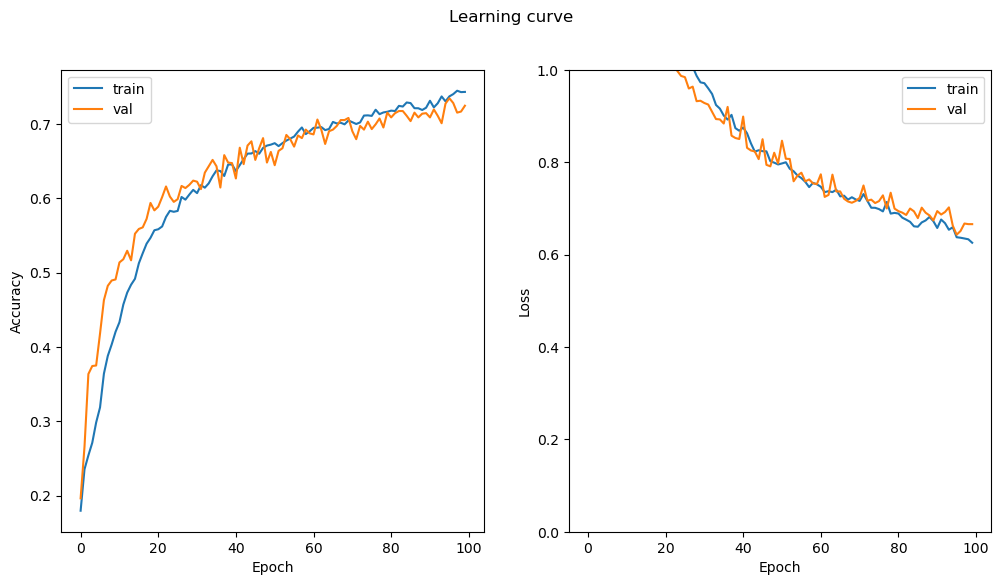

In [ ]:
print('HYPERPARAMETERS | Bach_size_balanced: {} Learning_rate_balanced: {}'.format(best_batch_size_balanced, best_lr_balanced))
draw_learning_curve(best_plot_balanced)

Confusion matrix plot for the best model trained for balanced data. The confusion matrix shows that the model incorrectly predicts labels: 1, 2, 4, 5.

model: Neural Network | data type: balanced
44/44 [==============================] - 0s 559us/step


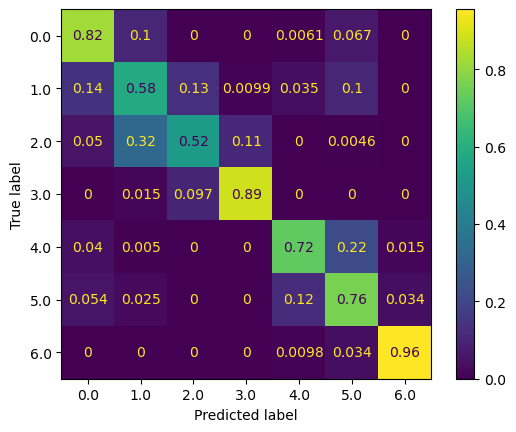

In [ ]:
NN_score_balanced = get_confusion_matrix('Neural Network', 'balanced', best_NN_model_balanced, X_balanced_test, y_balanced_test)

Neural Network performes when better trained on unbalanced data, so I save it to the file:

In [ ]:
best_NN_model.save('./models/neural_network_best.h5')

# Comparison of all models

Comparison of models trained on an unbalanced dataset using the success metric: accuracy. The Neural Network model achieved the highest score.

In [ ]:
models_score = [["Dummy_model", result[0][1]] ,
                ['Decision_tree', result[1][1]],
                ['Random_forest', result[2][1]],
                ['NN_model', NN_score]] 

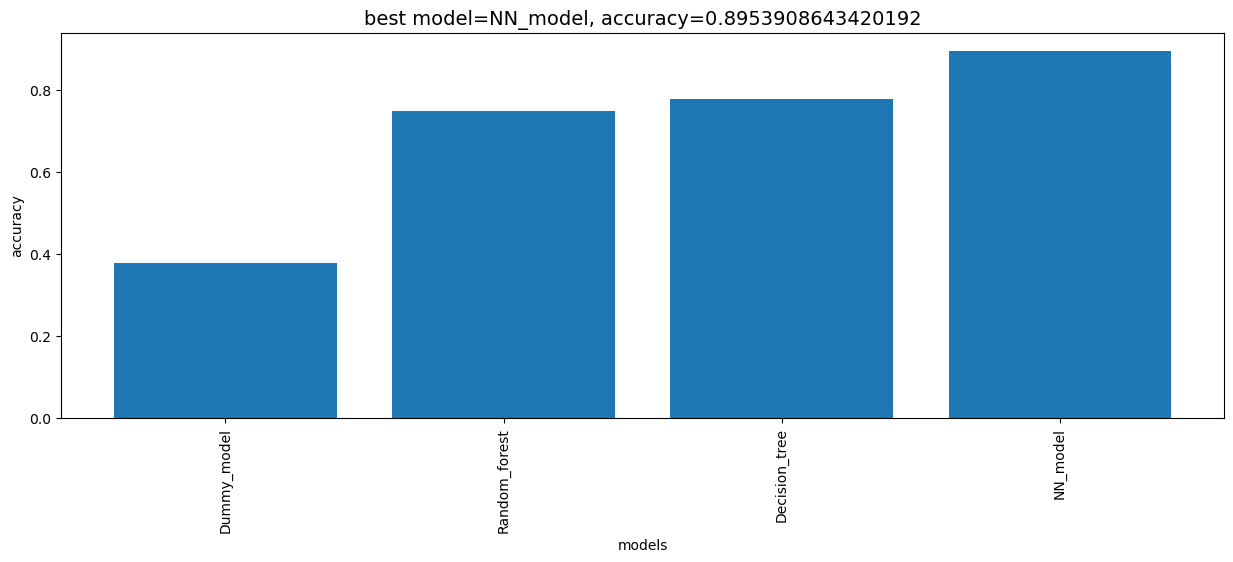

In [ ]:
plot_results(models_score, 'accuracy')

Comparison of models trained on a balanced dataset using the success metric: accuracy. The Random forest model achieved the highest score.

In [ ]:
models_score_balanced = [["Dummy_model", result_balanced[0][1]] ,
                ['Decision_tree', result_balanced[1][1]],
                ['Random_forest', result_balanced[2][1]],
                ['NN_model', NN_score_balanced]] 

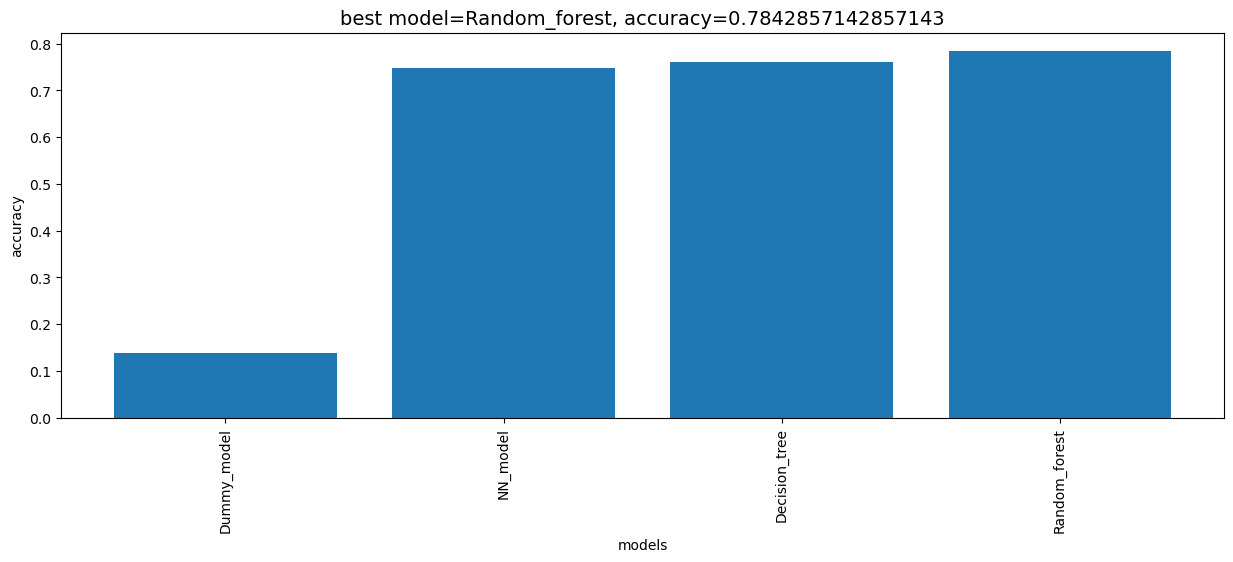

In [ ]:
plot_results(models_score_balanced, 'accuracy')

# Flask

Below I propose the script ("flask_script.py") for model deployment. Client should send a dictionary of the form

{"data": [model_name, X]},

where "model_name" is name of the chosen trained model: 

- "Heuristing"
- "DecisionTree"
- "RandomForest"
- "NeuralNetwork"

and

"X_test" is a data to make prediction on

import joblib
from flask import Flask, jsonify, request
from tensorflow.keras.models import load_model
import numpy as np

app = Flask(__name__)

 
@app.route("/predict", methods=["POST", "GET"])
def predict():

    model_name, data = request.get_json()["data"]


        
    if(model_name == 'Heuristic'):
        model = joblib.load("./models/dummy_best.joblib")
        prediction = model.predict(data) 
    
    if(model_name == 'DecisionTree'):
        model = joblib.load("./models/decision_tree_best.joblib")
        prediction = model.predict(data)

    if(model_name == 'RandomForest'):
        model = joblib.load("./models/random_forest_best.joblib")
        prediction = model.predict(data)   

  
    if(model_name == "NeuralNetwork"):
        model = load_model('./models/neural_network_best.h5')
        prediction = model.predict(data)
        prediction = np.argmax(prediction)        
  
   
    return jsonify({"Predicted class": prediction.tolist(), "Model": model_name})

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=8000)

The line code for making prediction on (locally) deployed model with 

model_name = "NeuralNetwork"

and example of
X = [[2306.0, 22.0, 13.0, 324.0, 82.0, 1047.0, 212.0, 213.0, 136.0, 313.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
with true label "4".

curl -H "Content-Type: application/json" -X POST -d '{"data": ["NeuralNetwork",[[2306.0, 22.0, 13.0, 324.0, 82.0, 1047.0, 212.0, 213.0, 136.0, 313.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
]}' http://localhost:8000/predict

### Here is the link to my image on Docker hub 
https://hub.docker.com/layers/nikolajanik/covertype/latest/images/sha256:52278556f629f04cf01cb7e3f3301a7a5d09cf3be185dbde3d5ce75dc56f935f

# Docker

Here I provide scripts for creating docker image.

### First, I need 2 files, :

1. requirements.txt
- joblib
- flask
- scikit-learn
- tensorflow

2. Dockerfile
- FROM python:3.9
- WORKDIR /app
- COPY requirements.txt .
- RUN pip install -r requirements.txt
- COPY . .
- CMD ["python", "flask_script.py"]

### Next I build and run Docker image:
- docker build -t cover_type .
- docker run -t cover_type

### To deploy my code I run:
- python flask_script.py
- curl -H "Content-Type: application/json" -X POST -d '{"data": ["NeuralNetwork",[[2306.0, 22.0, 13.0, 324.0, 82.0, 1047.0, 212.0, 213.0, 136.0, 313.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
]}' http://localhost:8000/predict

### To push my image on docker hub I run:
- docker logout
- docker login
- docker tag covertype nikolajanik/covertype
- docker push nikolajanik/covertype
